# Project: TMDb Movies Analysis:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Analysis Questions:
1. Is the more you spent on the movie the more you gain or not necessarily? (budget-revenue relationship)
2. Is the more popular the movie the more it gains? (popularity-revenue relationship)
3. Are vote average and popularity related?

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading Data

In [2]:
df = pd.read_csv('./tmdb-movies.csv')

### Inspecting Data

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

**Our dataset contains 10866 movies**

## Data Cleaning

### Checking for missing values

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Dropping columns with missing data 
**They are not related to our questions so it's okay to do that.**

**Drop columns with more than 8% missing data (92% not nulls)**

In [6]:
# dropping columns with more than 8% missing data 
# by specifying a threshold of required not nulls = 92% of the data
df.dropna(axis=1, thresh=int(df.shape[0]*0.92), inplace=True)

In [7]:
# checking again for missing values
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

### Dropping rows with missing data 
**There are still a few rows that contain missing data, lets drop those as well.**

In [8]:
# dropping rows that contain missing data
df.dropna(inplace=True)

## Sanity check

In [9]:
# let's check if dropped all the missing values
df.isna().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [10]:
# getting number of rows and columns
df.shape

(10725, 17)

**We now have no missing values!**

In [11]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


<a id='eda'></a>
## Exploratory Data Analysis

#### Some useful info about the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
id                10725 non-null int64
imdb_id           10725 non-null object
popularity        10725 non-null float64
budget            10725 non-null int64
revenue           10725 non-null int64
original_title    10725 non-null object
cast              10725 non-null object
director          10725 non-null object
overview          10725 non-null object
runtime           10725 non-null int64
genres            10725 non-null object
release_date      10725 non-null object
vote_count        10725 non-null int64
vote_average      10725 non-null float64
release_year      10725 non-null int64
budget_adj        10725 non-null float64
revenue_adj       10725 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


**Our dataset has 10 numerical columns:** 
['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


**and 7 string columns:** ['imdb_id', 'cast', 'director', 'overview', 'genres', 'release_date', 'original_title']

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10725.000000,10725.000000,1.072500e+04,1.072500e+04,10725.000000,10725.000000,10725.000000,10725.000000,1.072500e+04,1.072500e+04
mean,65182.327925,0.652852,1.481473e+07,4.034253e+07,102.502471,219.933054,5.964317,2001.255012,1.777804e+07,5.203541e+07
std,91470.421976,1.005025,3.107129e+07,1.176814e+08,30.458857,578.955633,0.930166,12.822147,3.447315e+07,1.454606e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10546.000000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20309.000000,0.387304,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73937.000000,0.721548,1.600000e+07,2.500526e+07,112.000000,148.000000,6.600000,2011.000000,2.113258e+07,3.476553e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### We can see that:

- Max budget for a movie = 425 Million Dollars.
- Average budget for a movie = 14,625,700 Dollars (About 14.5M)
- Max movie revenue = 2,781,506,000 Dollars (About 2.8 Billion Dollars)
- Average movie revenue = 40,342,530 Dollars (About 40 Million Dollars)

### Some single-variable explorations:

### Budget distribution:

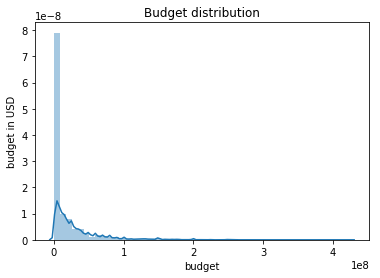

In [14]:
sns.distplot(df['budget']);
plt.title('Budget distribution');
plt.xlabel('budget');
plt.ylabel('budget in USD');

### Revenue distribution:

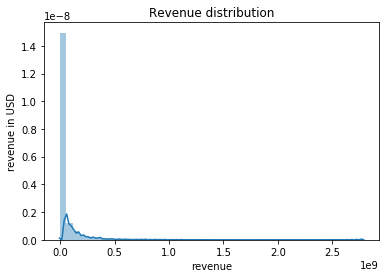

In [15]:
sns.distplot(df['revenue']);
plt.title('Revenue distribution');
plt.xlabel('revenue');
plt.ylabel('revenue in USD');

**We can see that both revenue and budget follow a normal distribution and are right-skewed.**

### The logic

**We will examine 3 relationships:**
1. revenue-budget (rev_bud)
2. revenue-population (rev-pop)
3. vote_average-popularity

**To do no. 1, we will:**
- Get top n movies of revenue (top revenues) and top n movies of budget (top budgeted)
- Get the common movies between the two lists
- Calculate the percentage of the movies that were in common between the two (ex: from a total of 100 movie, 55 of them exist in both lists.) which might indicate a correlation between the budget and the revenue.

**Same goes for 2 & 3.**

### Useful functions we will use later: (Implementing the logic)

In [16]:
def get_common_movies(typ, n=100):
    
    """
    Args:
    
        typ: type of the relationship ['rev_bud', 'rev_pop', 'vote_pop']
        
        n: number of movies to return
        
    Returns:
        
        common_movies: list containing the common movies' titles.
    
    """
    
    # getting top revenue movies
    top_revenue_movies = revenue_budget.sort_values(by='revenue', ascending=False)[:n]
    
    # specifying the type of the relationship under investigation
    
    if typ == 'rev_bud':
        
        # getting top budget movies
        top_budget_movies = revenue_budget.sort_values(by='budget', ascending=False)[:n]
        # getting common movies between budget & revenue
        common_movies = top_revenue_movies[top_revenue_movies['original_title'].isin(top_budget_movies['original_title'])]
    
    elif typ == 'rev_pop':
        
        # getting top popular movies
        top_popularity_movies = revenue_popularity.sort_values(by='popularity', ascending=False)[:n]
        # getting common movies between popularity & revenue
        common_movies = top_revenue_movies[top_revenue_movies['original_title'].isin(top_popularity_movies['original_title'])]
        
    elif typ == 'vote_pop':
        
        # getting top n popular movies
        top_popularity_movies = revenue_popularity.sort_values(by='popularity', ascending=False)[:n]
        # getting top n voted movies
        top_vote_movies = vote_popularity.sort_values(by='vote_average', ascending=False)[:n]
        # getting common movies between the previews top n's
        common_movies = top_vote_movies[top_vote_movies['original_title'].isin(top_popularity_movies['original_title'])]
    
    return common_movies

In [17]:
def print_n_commons(typ):
    
    """
    Args:
    
        typ: type of the relationship ['rev_bud', 'rev_pop', 'vote_pop']
                
    Returns:
        
        No returns.
    
    """
    
    # initializing list containing numbers 100, 200, 300, 400, ....., 900, 1000
    m = [i for i in range(100,1001,100)]
    
    commons = []
    
    # specifying the type of the relationship under investigation
    # n1 & n2 are just for the print statement names to change for each case.
    
    if typ == 'rev_bud':
        n1, n2 = 'revenues', 'budgets'
        
    elif typ == 'rev_pop':
        n1, n2 = 'revenues', 'popular'
        
    elif typ == 'vote_pop':
        n1, n2 = 'voted', 'popular'
    
    # iterating through m to get top-100, top-200, .... top-1000
    for val in m:
        
        # getting common movies
        common_movies = get_common_movies(typ, val)
        # adding the number of common movies to a list to use it when calculating % of commons
        commons.append(common_movies.shape[0])
        
        # printing result
        print("Common movies between top {} {} and top {} {} = {}".format(val, n1, val, n2, common_movies.shape[0]))
    
    # printing percentage of commons
    print("\nPerentage of common movies:\n", (np.array(commons)/np.array(m))*100)

### Q1: Is the more you spent on the movie the more you gain or not necessarily? (revenue-budget relationship)

### Let's first visualize the average-budget per year:

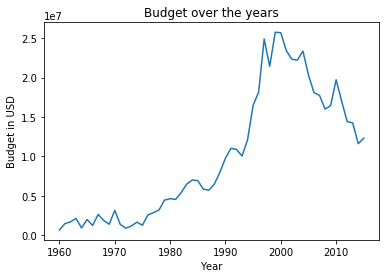

In [18]:
plt.plot(df.groupby(['release_year'])['budget'].mean());
plt.title('Budget over the years');
plt.xlabel('Year');
plt.ylabel('Budget in USD');

### Let's also look at the average-revenue per year:

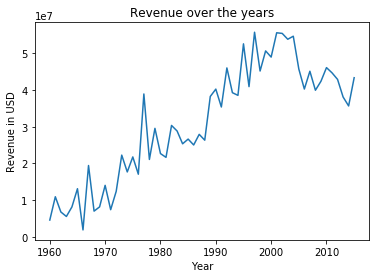

In [19]:
plt.plot(df.groupby(['release_year'])['revenue'].mean());
plt.title('Revenue over the years');
plt.xlabel('Year');
plt.ylabel('Revenue in USD');

**Despite the fluctuations, we can see that there was an increasing trend in both the budgets and the revenues of the movies, both peaked at about 2000-2001 then decreased a bit till 2010.**

**Let's explore this relationship more..**

In [20]:
revenue_budget = df[['id', 'revenue', 'budget', 'original_title']]
revenue_budget.head()

,id,revenue,budget,original_title
0,135397,1513528810,150000000,Jurassic World
1,76341,378436354,150000000,Mad Max: Fury Road
2,262500,295238201,110000000,Insurgent
3,140607,2068178225,200000000,Star Wars: The Force Awakens
4,168259,1506249360,190000000,Furious 7


### Let's plot budget vs revenue

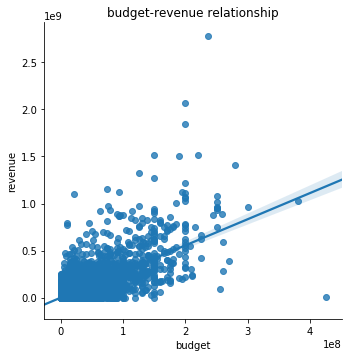

In [21]:
sns.lmplot(x="budget", y="revenue", data=revenue_budget);
plt.title('budget-revenue relationship');

### Getting top revenues and top budgets and displaying % of the commons between them.

In [22]:
print_n_commons('rev_bud')

Common movies between top 100 revenues and top 100 budgets = 47
Common movies between top 200 revenues and top 200 budgets = 104
Common movies between top 300 revenues and top 300 budgets = 177
Common movies between top 400 revenues and top 400 budgets = 238
Common movies between top 500 revenues and top 500 budgets = 302
Common movies between top 600 revenues and top 600 budgets = 361
Common movies between top 700 revenues and top 700 budgets = 423
Common movies between top 800 revenues and top 800 budgets = 489
Common movies between top 900 revenues and top 900 budgets = 550
Common movies between top 1000 revenues and top 1000 budgets = 623

Perentage of common movies:
 [ 47.          52.          59.          59.5         60.4         60.16666667
  60.42857143  61.125       61.11111111  62.3       ]


**There's some evidence to say that the more the movie is budgeted, the high likely it will succeed, as the only the 47 of the top budgeted were among the top revenue movies. However, the more we expand the top-X list, the more they have in common.**


**Except for the first one (top 100), more than 52% of the top budgeted movies were among the highest revenues.**

### Q2: Is the more the movie gains the popular it is? (revenue-popularity relationship)

In [23]:
revenue_popularity = df[['id', 'revenue', 'popularity', 'original_title']]
revenue_popularity.head()

,id,revenue,popularity,original_title
0,135397,1513528810,32.985763,Jurassic World
1,76341,378436354,28.419936,Mad Max: Fury Road
2,262500,295238201,13.112507,Insurgent
3,140607,2068178225,11.173104,Star Wars: The Force Awakens
4,168259,1506249360,9.335014,Furious 7


### Let's plot vote popularity vs revenue

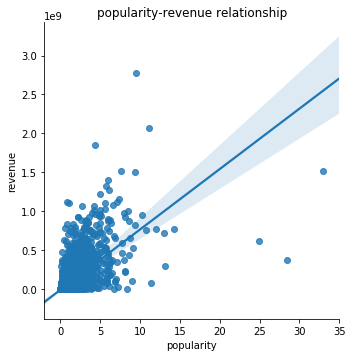

In [24]:
sns.lmplot(x="popularity", y="revenue", data=revenue_popularity);
plt.title('popularity-revenue relationship');

### Getting top revenues and top popular and displaying % of the commons between them.

In [25]:
print_n_commons('rev_pop')

Common movies between top 100 revenues and top 100 popular = 44
Common movies between top 200 revenues and top 200 popular = 97
Common movies between top 300 revenues and top 300 popular = 158
Common movies between top 400 revenues and top 400 popular = 213
Common movies between top 500 revenues and top 500 popular = 275
Common movies between top 600 revenues and top 600 popular = 336
Common movies between top 700 revenues and top 700 popular = 395
Common movies between top 800 revenues and top 800 popular = 460
Common movies between top 900 revenues and top 900 popular = 531
Common movies between top 1000 revenues and top 1000 popular = 604

Perentage of common movies:
 [ 44.          48.5         52.66666667  53.25        55.          56.
  56.42857143  57.5         59.          60.4       ]


**It's not necessarily that the more the more revenue the movie had the popular it is, as top(100/200) had hess than 50% between top revenue and top popular. In addition, even if we looked at the top(300/400/500) the percentage is slightly higher han 50% which is not an enough indication.**

### Q3: Are vote_average and popularity related?

In [26]:
vote_popularity = df[['id', 'vote_average', 'popularity', 'original_title']]
vote_popularity.head()

,id,vote_average,popularity,original_title
0,135397,6.5,32.985763,Jurassic World
1,76341,7.1,28.419936,Mad Max: Fury Road
2,262500,6.3,13.112507,Insurgent
3,140607,7.5,11.173104,Star Wars: The Force Awakens
4,168259,7.3,9.335014,Furious 7


### Let's polt vote vs popularity

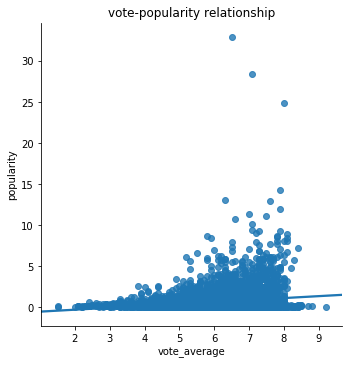

In [27]:
sns.lmplot(x="vote_average", y="popularity", data=vote_popularity);
plt.title('vote-popularity relationship');

### Getting top voted and top popular and displaying % of the commons between them.

In [28]:
print_n_commons('vote_pop')

Common movies between top 100 voted and top 100 popular = 14
Common movies between top 200 voted and top 200 popular = 35
Common movies between top 300 voted and top 300 popular = 63
Common movies between top 400 voted and top 400 popular = 87
Common movies between top 500 voted and top 500 popular = 125
Common movies between top 600 voted and top 600 popular = 136
Common movies between top 700 voted and top 700 popular = 166
Common movies between top 800 voted and top 800 popular = 196
Common movies between top 900 voted and top 900 popular = 225
Common movies between top 1000 voted and top 1000 popular = 261

Perentage of common movies:
 [ 14.          17.5         21.          21.75        25.          22.66666667
  23.71428571  24.5         25.          26.1       ]


**There's no evidence that popularity has anything to do with the movie's votings.**

### Let's check the variables' correlations and see if they support our analysis

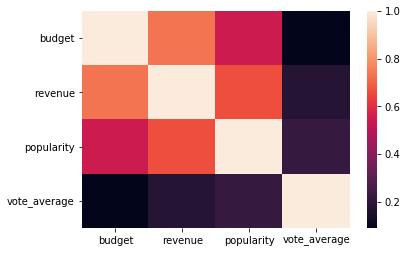

In [29]:
sns.heatmap(df[['budget', 'revenue', 'popularity', 'vote_average']].corr())

In [30]:
df[['budget', 'revenue', 'popularity', 'vote_average']].corr()

,budget,revenue,popularity,vote_average
budget,1.000000,0.734436,0.544189,0.087467
revenue,0.734436,1.000000,0.662824,0.178699
popularity,0.544189,0.662824,1.000000,0.218123
vote_average,0.087467,0.178699,0.218123,1.000000


### Observations:
- budget is the most correlated variable with revenue (supports our analysis)
- popularity is more correlated with revenue than budget (we used budget in our analysis)
- vote average isn't correlated with popularity (supports our analysis)

<a id='conclusions'></a>
## Conclusions


### Results
- There was an increasing trend in both the budgets and the revenues of the movies over the years, both peaked at about 2000-2001 then decreased a bit till 2010.
- There's some evidence to say that the more the movie is budgeted, the high likely it will succeed, further testing or prediction can be done later.
- It's not necessarily that the more the more revenue the movie had the popular it is.
- There's no evidence that popularity has anything to do with the movie's votings.

### Limitations
- The dataset contained some missing values which we had to drop to get proper results, more full-data can be gathered.
- The statistics providing these results are not inferential statistics, as no statistical testing or experiments were made.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMdb_Movies_Analysis.ipynb'])

0